# Alg. Regresión Logística

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import scipy.optimize as opt


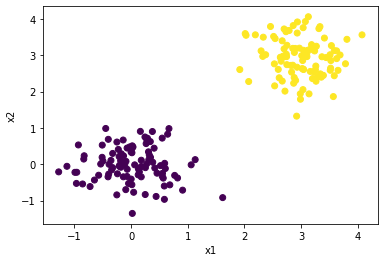

In [3]:
# Generar los datos para la clasificación 

X,Y = make_blobs(n_samples=200, centers=[[0,0],[3,3]], cluster_std=0.5, n_features=2)

plt.scatter(X[:,0],X[:,1], c=Y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
# Función logística

def fun_log(z):
    return 1/(1+np.exp(-z))

# Función de regresión logística hB(x) = g(B^T*X)
def reg_log(B,X,Y):
    hB= np.matrix(X)*np.matrix(B).transpose()
    return np.array(fun_log(hB))[:,0]

# Función de costo de entropía
def fun_cost(B,X,Y):
    yhat = reg_log(B,X,Y)
    J = np.sum(-Y*np.log(yhat) - (1-Y)*np.log(1-yhat))*(1/len(Y))
    return J


In [5]:
# Inicializar las variables para la optimizacion

# xa=[1;x]
# B=[B0;B1;...;Bn]

#Y = B^T *xa = B0 + B1x1+...+Bnxn

Xa= np.append(np.ones((len(Y),1)), X, axis=1)
m,n =np.shape(Xa)
B=np.zeros(n)



In [6]:
# Optimizacion por medio de la libreria opt.optimize

res = opt.minimize(fun_cost, B, args=(Xa,Y))
B = res.x

/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sy

In [7]:
# Simular la regresion logistica
Yhat = np.round(reg_log(B,Xa,Y),0)

/home/deloga/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [8]:
Yhat

array([0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.])

In [9]:
# Generar todas las posibles combinaciones entre x1 y x2

x = np.arange(-3,5,0.01)
y = np.arange(-3,5,0.01)
Xm,Ym = np.meshgrid(x,y)
m,n = np.shape(Xm)
Xmr = np.reshape(Xm,(m*n,1))
Ymr = np.reshape(Ym,(m*n,1))

Xtmp = np.append(Xmr,Ymr,axis=1)
Xtmp = np.append(np.ones((len(Xmr),1)),Xtmp,axis=1)
Ytmp = np.round(reg_log(B,Xtmp,Xmr),0)

Z= np.reshape(Ytmp, (m,n))

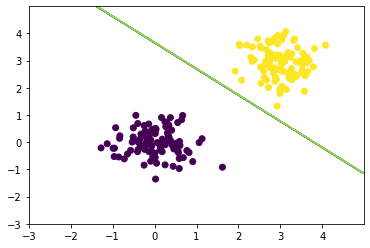

In [10]:
plt.contour(Xm,Ym,Z)

plt.scatter(X[:,0],X[:,1], c=Y)
plt.show()

## Dataset ex2dat2



In [26]:
data = pd.read_csv('../Data/ex2data2.txt',header=None)

In [27]:
data


,0,1,2
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [ ]:
X_data = data.iloc[:,0:1]
Y_data = data.iloc[:,2]